# COBRApy

COBRApy is a package for constraint-based modeling of biological networks written in Python.

This tool allows loading and inspecting Genome-Scale Metabolic (GEM) models written in the Systems Biology Markup Language (SBML) format.

Using COBRApy, one can analyse the following model contents:
1. Reactions
2. Metabolites
3. Genes
4. Exchange reactions (Environmental Conditions)

COBRApy allows manipulating the contents of a GEM model. For instance, one can edit reactions' flux bounds, knock out a metabolic gene, or change the environmental conditions.

Phenotype prediction can be simulated with several flux analysis methods implemented in COBRApy. These include Flux Balance Analysis (FBA), Parsimonious FBA, or Flux Variability Analysis (FVA).

The simulation of gene and reaction deletions for a given GEM model is a simple and straightforward process. One can simulate single or double knock outs using one of the flux analysis methods mentioned above.

## Instalation


### Requirements
The following requirements need to be installed to use COBRApy:
- Python 3.6 or higher
- pip must be installed
- GLPK solver is used by default but CPLEX is prefered


### How to install COBRApy?
```
pip install cobra
```

## Working with a GEM model

COBRApy can be used to read a GEM model in SBML format file.
For this practical session, we will be using two models:
- _E. coli_ core model which contains the central carbon metabolism of _Escherichia coli_ -> file: ..data/e_coli_core.xml

The reactions, metabolites, and genes encoded into a SBML format file can be parsed by COBRApy. These contents are loaded into Python objects simple to use, namely `cobra.Reaction`, `cobra.Metabolite`, and `cobra.Gene`

The model itself will be available as an `cobra.Model` object containing all these attributes.

In [1]:
# importing cobra
import cobra

# Loading a model
model_path = '../data/e_coli_core.xml'
model = cobra.io.read_sbml_model(model_path)

model

Name,e_coli_core
Memory address,0x024bed7a8888
Number of metabolites,72
Number of reactions,95
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


In [2]:
#retriving first five reactions of the model
model.reactions[0:5]

[<Reaction PFK at 0x24bee86d748>,
 <Reaction PFL at 0x24bee86d708>,
 <Reaction PGI at 0x24bee874a88>,
 <Reaction PGK at 0x24bee87aa08>,
 <Reaction PGL at 0x24bee87afc8>]

In [3]:
#inspecting the first reaction of the model
model.reactions[0]

Reaction identifier,PFK
Name,Phosphofructokinase
Memory address,0x24bee86d748
Stoichiometry,"atp_c + f6p_c --> adp_c + fdp_c + h_c ATP C10H12N5O13P3 + D-Fructose 6-phosphate --> ADP C10H12N5O10P2 + D-Fructose 1,6-bisphosphate + H+"
GPR,b3916 or b1723
Lower bound,0.0
Upper bound,1000.0


In [4]:
#inspecting a reaction by its ID
model.reactions.get_by_id("ACALD")

Reaction identifier,ACALD
Name,Acetaldehyde dehydrogenase (acetylating)
Memory address,0x24bee87af08
Stoichiometry,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c Acetaldehyde + Coenzyme A + Nicotinamide adenine dinucleotide <=> Acetyl-CoA + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,b0351 or b1241
Lower bound,-1000.0
Upper bound,1000.0


In [5]:
#retriving first five metabolites of the model
model.metabolites[0:5]

[<Metabolite glc__D_e at 0x24bed7dffc8>,
 <Metabolite gln__L_c at 0x24bed7dff88>,
 <Metabolite gln__L_e at 0x24bed7ee788>,
 <Metabolite glu__L_c at 0x24bee7c22c8>,
 <Metabolite glu__L_e at 0x24bee7c2508>]

In [6]:
#inspecting the first metabolite of the model
model.metabolites[0]

Metabolite identifier,glc__D_e
Name,D-Glucose
Memory address,0x24bed7dffc8
Formula,C6H12O6
Compartment,e
In 2 reaction(s),"EX_glc__D_e, GLCpts"


In [7]:
#inspecting a metabolite by its ID
model.metabolites.get_by_id("13dpg_c")

Metabolite identifier,13dpg_c
Name,3-Phospho-D-glyceroyl phosphate
Memory address,0x24bee7d2408
Formula,C3H4O10P2
Compartment,c
In 2 reaction(s),"PGK, GAPD"


In [8]:
#retriving first five genes of the model
model.genes[0:5]

[<Gene b1241 at 0x24bee8049c8>,
 <Gene b0351 at 0x24bee8047c8>,
 <Gene s0001 at 0x24bed7bbf48>,
 <Gene b1849 at 0x24bee814608>,
 <Gene b3115 at 0x24bee814a88>]

In [9]:
#inspecting the first gene of the model
model.genes[0]

Gene identifier,b1241
Name,adhE
Memory address,0x24bee8049c8
Functional,True
In 2 reaction(s),"ACALD, ALCD2x"


In [10]:
#inspecting a gene by its ID
model.genes.get_by_id('b1241')

Gene identifier,b1241
Name,adhE
Memory address,0x24bee8049c8
Functional,True
In 2 reaction(s),"ACALD, ALCD2x"


### Reactions

In COBRApy reactions are objects that can be inspected. These objects can contain usefull information for all reactions in the model, such as:
- name;
- metabolites;
- stoichiometry;
- genes;
- formula;
- reversibility;
- flux bounds;
- gpr;

In [11]:
#inspecting the reaction name, formula, metabolites, and stoichiometry.
reaction = model.reactions.get_by_id('ACALD')

print(reaction.name, '\n')
print(reaction.reaction, '\n')
for metabolite, coefficient in reaction.metabolites.items():
    print(metabolite, '->', coefficient)

Acetaldehyde dehydrogenase (acetylating) 

acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c 

acald_c -> -1.0
coa_c -> -1.0
nad_c -> -1.0
accoa_c -> 1.0
h_c -> 1.0
nadh_c -> 1.0


In [12]:
#inspecting reversibility and flux bounds.
print(reaction.lower_bound, "< ACALD <", reaction.upper_bound, '\n')
print(reaction.reversibility, '\n')
print(reaction.bounds)

-1000.0 < ACALD < 1000.0 

True 

(-1000.0, 1000.0)


In [13]:
#change reaction bounds
reaction.bounds = (0, 1000)
print(reaction.lower_bound, "< ACALD <", reaction.upper_bound, '\n')
print(reaction.reversibility)

-1000.0 < ACALD < 1000.0 

True


#### GPR
A Gene-Protein-Reaction (GPR) rule is a boolean representation of the gene requirements for a given reaction to be active.
In COBRApy, a string representation of the GPR is stored as the `gene_reaction_rule` in the `Reaction` object.

In [14]:
#inspect gene reaction rule
reaction.gene_reaction_rule

'b0351 or b1241'

In the `ACALD` reaction, either gene *b0351* or *b1241* are required for this reaction to be active.

### Metabolites

In COBRApy metabolites are objects that can be inspected. These objects can contain usefull information for all metabolites in the model, such as:
- name;
- chemical formula;
- compartment;
- reactions;

In [15]:
#inspecting metabolite name, chemical formula, compartment and reactions.
metabolite = model.metabolites.get_by_id('13dpg_c')

print(metabolite.name, '\n')
print(metabolite.formula, '\n')
print('Metabolite Compartment:',metabolite.compartment, '\n')
for _reaction in metabolite.reactions:
    print(_reaction.id, ':', reaction.reaction)

3-Phospho-D-glyceroyl phosphate 

C3H4O10P2 

Metabolite Compartment: c 

PGK : acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
GAPD : acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c


### Genes

In COBRApy metabolites are objects that can be inspected. These objects can contain usefull information for all metabolites in the model, such as:
- name;
- reactions;

In [16]:
#inspect gene name and reactions.
gene = model.genes.get_by_id('b0351')

print(gene.name, '\n')
for reaction_ in gene.reactions:
    print(reaction_.id, ':', reaction.gene_reaction_rule)

mhpF 

ACALD : b0351 or b1241


### Exchanges

In COBRApy exchanges are reaction objects that can be inspected in the model. These special reactions define the environmental condictions (eg. medium) of the model. According to the lower and upper bound of each exchange reactions, one can visualize the model's uptake and secretion metabolites.

In [17]:
#inspecting the reaction name, formula, metabolites, and stoichiometry.
for exchange in model.exchanges:
    print(exchange.name, '->', exchange.bounds)

Acetate exchange -> (0.0, 1000.0)
Acetaldehyde exchange -> (0.0, 1000.0)
2-Oxoglutarate exchange -> (0.0, 1000.0)
CO2 exchange -> (-1000.0, 1000.0)
Ethanol exchange -> (0.0, 1000.0)
Formate exchange -> (0.0, 1000.0)
D-Fructose exchange -> (0.0, 1000.0)
Fumarate exchange -> (0.0, 1000.0)
D-Glucose exchange -> (-10.0, 1000.0)
L-Glutamine exchange -> (0.0, 1000.0)
L-Glutamate exchange -> (0.0, 1000.0)
H+ exchange -> (-1000.0, 1000.0)
H2O exchange -> (-1000.0, 1000.0)
D-lactate exchange -> (0.0, 1000.0)
L-Malate exchange -> (0.0, 1000.0)
Ammonia exchange -> (-1000.0, 1000.0)
O2 exchange -> (-1000.0, 1000.0)
Phosphate exchange -> (-1000.0, 1000.0)
Pyruvate exchange -> (0.0, 1000.0)
Succinate exchange -> (0.0, 1000.0)


### Linear problem
The number of degrees of freedom can be calculated by subtracting the number of variables by the number of linear mass equations. That is, one can determine the degree of under-determination of this model by subtracting the number reactions by the number of metabolites.

In [41]:
# calculing the linear problem degrees of freedom
degrees = len(model.reactions) - len(model.metabolites)
degrees

23

### Phenotype Prediction

COBRApy includes three different algortithms for phenotype prediction. These include Flux Balance Analysis (FBA), Parsimonious Flux Balance Analysis (pFBA), and Flux Variability Analysis (FVA).

To perform a simulation using one of these methods, you should first define an objective function. This can be a reaction or an exchange, which will be maximized or minimized. By default, the biomass reaction is set as the model objective function as this mimics the biological behavior of most organisms.

In [18]:
model.objective = 'BIOMASS_Ecoli_core_w_GAM'

#### Flux Balance Analysis (FBA)

FBA simulations can be performed using `model.optimize()`. This returns a solution object, which includes the result of the simulation. This includes:
- objective_value;
- status;
- fluxes;

In [40]:
#performing a FBA simulation
fba_solution = model.optimize()
fba_solution

,fluxes,reduced_costs
PFK,7.477382,8.673617e-19
PFL,0.000000,-1.527746e-02
PGI,4.860861,0.000000e+00
PGK,-16.023526,3.469447e-18
PGL,4.959985,0.000000e+00
...,...,...
NADH16,38.534610,0.000000e+00
NADTRHD,0.000000,-2.546243e-03
NH4t,4.765319,0.000000e+00
O2t,21.799493,0.000000e+00


Models solved using the FBA method can be further analysed using the `model.summary()` method.


This method returns the flux value for the reaction defined as objective function. It also returns the fluxes for the exchange reactions. In this table, one can see uptake fluxes, which corresponds to the rates of metabolite cosumption in the model. On the other hand, the secretion fluxes corresponds to the rates of metabolite production in the model.

In [20]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


#### Parsimonious Flux Balance Analysis (pFBA)

pFBA simulations gives the optimal growth rate, while minimizing the total sum of fluxes.
pFBA can be used from the flux analysis package `cobra.flux_analysis.pfba(model)`.

In [21]:
#performing pfba simulation
pfba_solution = cobra.flux_analysis.pfba(model)
pfba_solution

,fluxes,reduced_costs
PFK,7.477382,-2.000000
PFL,0.000000,5.733333
PGI,4.860861,-2.000000
PGK,-16.023526,2.000000
PGL,4.959985,-2.000000
...,...,...
NADH16,38.534610,-2.000000
NADTRHD,0.000000,1.422222
NH4t,4.765319,-2.000000
O2t,21.799493,-2.000000


The optimal solution of the pFBA is considerably different from the FBA result. This happens because the objective value for the pFBA is defined as the sum of all flux values (`sum(abs(pfba_solution.fluxes.values))`). On the other hand the FBA result corresponds to the flux value of the reaction that is being optimized (`fba_solution.fluxes["Biomass_Ecoli_core"]`).

In [22]:
#calculating the objective value of a pFBA solution
sum(abs(pfba_solution.fluxes.values))

518.4220855176067

#### Flux Variability Analysis (FVA)

FBA does not obtain an unique flux distribution for a given objective function, but rathar a space with multiple optimum soltuion. FVA is a simulation method that finds the possible flux range for each reaction while optimizing the objective function. FVA can be used from the flux analysis package `cobra.flux_analysis.flux_variability_analysis(model)`.

In [23]:
#performing fva simulation
fva_solution = cobra.flux_analysis.flux_variability_analysis(model)
fva_solution

,minimum,maximum
PFK,7.477382,7.477382
PFL,0.000000,0.000000
PGI,4.860861,4.860861
PGK,-16.023526,-16.023526
PGL,4.959985,4.959985
...,...,...
NADH16,38.534610,38.534610
NADTRHD,0.000000,0.000000
NH4t,4.765319,4.765319
O2t,21.799493,21.799493


### Simulating Deletions

As previously mentioned, COBRApy can be used to simulate gene or reaction knock outs or deletions.

#### Single Reaction and Gene Knock outs

The function `knock_out()` can be used to access what happens when a specific reaction is knocked out and not allowed to have any flux. Considering the previously analysed PFK reaction:

In [24]:
#knock out the ACALD reaction
with model:
    model.reactions.PFK.knock_out()
    print('PFK knocked out: ', model.optimize())

PFK knocked out:  <Solution 0.704 at 0x24beec24148>


In [25]:
#knock out the b1723 and b3916 genes, which are associated with the pfk reaction
with model:
    model.genes.b1723.knock_out()
    print('b1723 knocked out: ', model.optimize())
    model.genes.b3916.knock_out()
    print('b3916 knocked out: ', model.optimize())

b1723 knocked out:  <Solution 0.874 at 0x24beec27248>
b3916 knocked out:  <Solution 0.704 at 0x24beec12048>


Moreover, COBRApy incorporates to simulation methods that are used predict the flux distribution after a gene knock out. These are the Minimization of Metabolic Adjustment (MOMA), which can be called using `cobra.flux_analysis.moma()`, and Regulatory On/Off Minimization (ROOM), using `cobra.flux_analysis.room()`.

In [26]:
#using MOMA with COBRApy
with model:
    model.genes.b1723.knock_out()
    model.genes.b3916.knock_out()
    moma_result = cobra.flux_analysis.moma(model, fba_solution)
    print('MOMA Result: ', moma_result)

MOMA Result:  <Solution 288.041 at 0x24beecb6208>


In [27]:
#using ROOM with COBRApy
with model:
    model.genes.b1723.knock_out()
    model.genes.b3916.knock_out()
    room_result = cobra.flux_analysis.room(model, fba_solution)
    print('ROOM Result: ', room_result)

ROOM Result:  <Solution 41.000 at 0x24beedc9988>


#### Single Deletions

Single gene and reaction delections can also be simulated with the flux analysis package of COBRApy. To do so the `cobra.flux_analysis.single_gene_deletion()` and `cobra.flux_analysis.single_reaction_deletion()` methods.

In [28]:
#single reaction deletion
reaction_deletion_results = cobra.flux_analysis.single_reaction_deletion(model)
reaction_deletion_results

,ids,growth,status
0,{PIt2r},0.000000,optimal
1,{EX_pyr_e},0.873922,optimal
2,{ME1},0.873922,optimal
3,{FORt2},0.873922,optimal
4,{PPS},0.873922,optimal
...,...,...,...
90,{H2Ot},0.383515,optimal
91,{ETOHt2r},0.873922,optimal
92,{GND},0.863813,optimal
93,{EX_etoh_e},0.873922,optimal


In [29]:
#single gene deletion
gene_deletion_results = cobra.flux_analysis.single_gene_deletion(model)
gene_deletion_results

,ids,growth,status
0,{b2097},0.873922,optimal
1,{b0903},0.873922,optimal
2,{b4090},0.873922,optimal
3,{b2935},0.873922,optimal
4,{b3603},0.873922,optimal
...,...,...,...
132,{b0008},0.873922,optimal
133,{b3213},0.873922,optimal
134,{b1101},0.873922,optimal
135,{b2297},0.873922,optimal


It is worth noting that genes and reactions with a growth value equal to zero can be considered as essential genes or essential reactions, respectively.

#### Double Delections

Double gene and reaction delections can also be simulated with the flux analysis package of COBRApy. To do so the `cobra.flux_analysis.double_gene_deletion()` and `cobra.flux_analysis.double_reaction_deletion()` methods. These methods test the deletion of all the possible combinations.

In [30]:
#double reaction deletion
double_reaction_deletion_results = cobra.flux_analysis.double_reaction_deletion(model)
double_reaction_deletion_results

,ids,growth,status
0,"{PFL, ICL}",0.873922,optimal
1,"{ACt2r, NADH16}",0.206935,optimal
2,"{EX_gln__L_e, D_LACt2}",0.873922,optimal
3,"{ACt2r, RPE}",0.865716,optimal
4,"{CO2t, PYK}",0.429326,optimal
...,...,...,...
4555,"{PGK, CS}",0.000000,optimal
4556,"{EX_pyr_e, PPC}",0.870745,optimal
4557,"{FBA, PPS}",0.481972,optimal
4558,"{ADK1, MALS}",0.873922,optimal


In [31]:
#double reaction deletion
double_gene_deletion_results = cobra.flux_analysis.double_gene_deletion(model)
double_gene_deletion_results

,ids,growth,status
0,"{b2914, b2282}",0.211663,optimal
1,"{b3956, b3114}",0.870745,optimal
2,"{b1852, b0734}",0.863813,optimal
3,"{b3919, b0978}",0.704037,optimal
4,"{b2417, b2458}",0.873922,optimal
...,...,...,...
9448,"{b2282, b1773}",0.211663,optimal
9449,"{b1524, b1380}",0.873922,optimal
9450,"{b1812, b2465}",0.873922,optimal
9451,"{b2282, b2925}",0.211663,optimal


### Production envelopes

Production Envelopes can be used to show distinct phases of optimal growth using two different carbon substrates. If we want to access a phenotype phase plane to evaluate uptakes of Glucose and Oxygen:

In [32]:
#How to perform a production envolope
prod_env = cobra.flux_analysis.production_envelope(model, ["EX_glc__D_e", "EX_o2_e"])
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.000000,0.00000,NaN,-10.0,-60.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.072244,1.31005,NaN,-10.0,-56.842105
2,EX_glc__D_e,0.0,0.0,NaN,0.144488,2.62010,NaN,-10.0,-53.684211
3,EX_glc__D_e,0.0,0.0,NaN,0.216732,3.93015,NaN,-10.0,-50.526316
4,EX_glc__D_e,0.0,0.0,NaN,0.288975,5.24020,NaN,-10.0,-47.368421


Moreover, if we want to specify the carbon source, the `production_envelope()` can also return the carbon and mass yield. For instance, when the objective is to produce Acetate, it is possible to obtain a production envelope as follows and quickly plot the results:

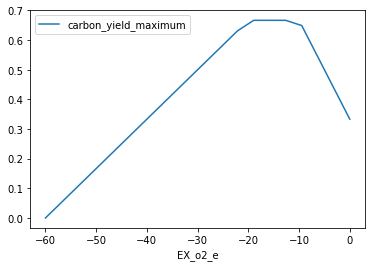

In [33]:
#obtain a plot of a production envelope using glucose as carbon source and optimizing Acetate production
prod_env = cobra.flux_analysis.production_envelope(model, ["EX_o2_e"], objective="EX_ac_e", carbon_sources="EX_glc__D_e")
prod_env.plot(kind='line', x='EX_o2_e', y='carbon_yield_maximum')

Finally, the production envelope can also be used obtain a flux variation plot. This can be achieved as follows:

In [34]:
#obtain a flux varariation plot
prod_env_co2 = cobra.flux_analysis.production_envelope(model, ["Biomass_Ecoli_core"], objective=['EX_co2_e'])
prod_env_co2.plot(kind='line', x='Biomass_Ecoli_core', y=['flux_minimum', 'flux_maximum'])

KeyError: 'Biomass_Ecoli_core'

### Pathway Visualization

COBRApy does not include any pathway visualization method. Nevertheless, independent tools that work with cobra models can be use for that goal. One of such tools is named Escher.

Escher allows the visualization of metabolic pathway maps. Escher maps can be build using the `escher.Build()` function, which requires the model and a FBA solution.

To obtain the metabolic map for the model in question, Escher can be run as follows:

In [ ]:
import escher

builder = escher.Builder(map_name='e_coli_core.Core metabolism', model=model, reaction_data=fba_solution.fluxes)
builder